In [12]:
# Import plotting packages
import pandas as pd
from matplotlib import pyplot 
from matplotlib.image import imread

In [18]:
# Set plot size
pyplot.rcParams['figure.figsize'] = [15, 10]

In [10]:
def plot_first_nine(folder = 'train-jpg/'):
    '''
    Input: File path to training data.
    Output: Plot of first 9 images in training data.
    
    We plot 9 images because otherwise we will have to
    write formatting code for the sub-plot which is not
    worth the time.
    '''
    for i in range(9):
        # pyplot.subplot takes 3 digit code 
        # The first number is the number of rows
        # The second number is the number of columns
        # The third number is the position in the subplot 
        pyplot.subplot(340 + 1 + i)
        # Define filename
        filename = folder + 'train_' + str(i) + '.jpg'
        # Load image pixels
        image = imread(filename)
        # Plot raw pixel data
        pyplot.imshow(image)
    # Show the figure
    pyplot.show()
    # End the function
    return

In [19]:
def load_mapping_data(file_name = 'train_v2.csv'):
    '''
    Input: mapping file name
    Output: mapping file data-frame
    '''
    mapping = pd.read_csv('train_v2.csv')
    print(mapping.shape)
    print(mapping.head())
    return(mapping)

In [26]:
def create_tag_mapping(mapping):
    '''
    Input: mapping data-frame
    Output: Dictionary mapping labels to integers.
    '''
    # Initialize labels
    # Labels is a set so calling update will not affect uniqueness
    labels = set()
    
    # Loop through the data-frame
    # Split the tag values on spaces
    # Then update the set with the tags
    for i in range(len(mapping)):
        tags = mapping['tags'][i].split(' ')
        labels.update(tags)
    
    # Turn into a list and sort
    labels = list(labels)
    labels.sort()
    
    # First relate labels to integers
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    
    # Return statement
    return(labels_map, inv_labels_map)

In [37]:
def create_file_mapping(mapping_df):
    '''
    Input: mapping data-frame
    Output: mapping dictionary of filename to tags
    '''
    # Initialize the dictionary
    mapping = dict()
    # Iterate through the data-frame range
    for i in range(len(mapping_df)):
        # Store names and tags
        name, tags = mapping_df['image_name'][i], mapping_df['tags'][i]
        # Put them in the dictionary as name:tag key value pairs
        mapping[name] = tags.split(' ')
    
    # Return mapping
    return mapping

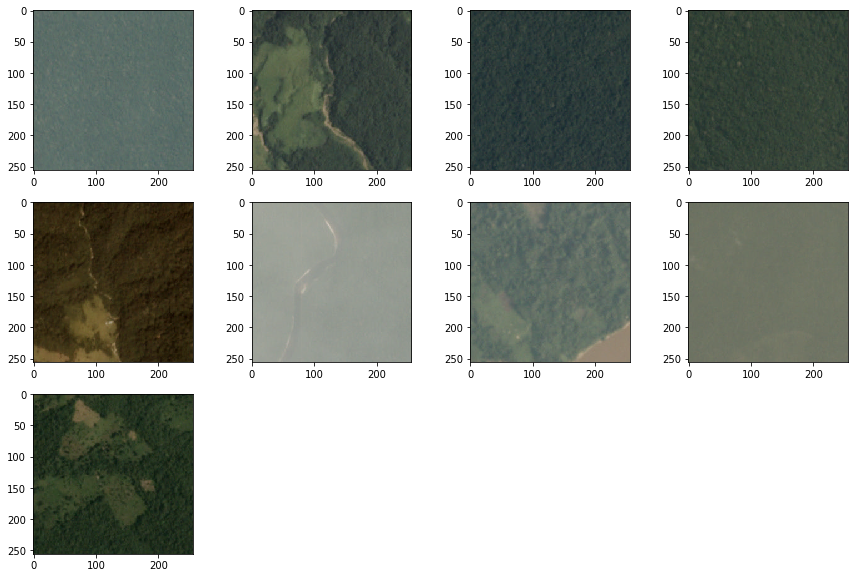

(40479, 2)
  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


In [36]:
if __name__ == '__main__':
    
    plot_first_nine()
    mapping_df = load_mapping_data()
    labels_map, inv_labels_map = create_tag_mapping(mapping_df)
    mapping = create_file_mapping(mapping_df)